### Import libraries

This notebook can be run after downloading the ***PY_Analysis*** module from https://github.com/asitha-sena/PY_Analysis. The code will only work with **Python3** branch of this git repository. 

In [1]:
# import sys
# sys.path.append('c:/Temp/PY_Analysis')

import py_monotonic

import numpy as np
import matplotlib.pyplot as plt

### Structure of module

This module is written in the functional style of programming where each step/component of the model is defined by a function. These functions can be assembled together to build a model of a laterally loaded pile and then perform a p-y analysis. A model consists of the following components:
1. Ground model or idealized soil profile
    * *py_monotonic.design_soil_profile_SI()*
2. p-y curves
    * *matlock_py_curves_SI()*
3. Finite-difference solver
    * *fd_solver_1()*
    * *fd_solver_2()*
4. Pile dimensions and material

The above components can be assembled in a "main" function by the user. The following pre-built main functions are available:

1. py_analysis_1_SI()
    * Analyse a pipe pile with user defined boundary conditions at the pile head ($F_0, V_0, M_0$) and pile tip ($V_n, M_n$).
2. py_analysis_2_SI()
    * Analyse a pipe pile with user defined boundary conditions at the pile head ($F_0, y_0, M_0$) and pile tip ($V_n, M_n$).


### Define $S_u$ versus depth profile

The soil profile is defined as a numpy array with depths defined relative to the pile head. The docstring in ***py_monotonic.design_soil_SI*** explains details of this input array.

This function converts the soil profile defined by the input array and outputs:
* The location of the mudline relative to the pile head ($z_0$)
* An interpolation function to calculate $S_u$ given the depth relative to the pile head
* An interpolation function to calculate $\sigma_v'$ given the depth relative to the pile head

These parameters and functions are used to calculate the p-y curves.

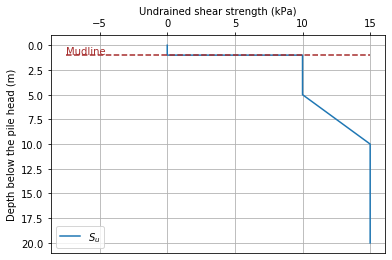

In [2]:
#                         Depth  Su   γ_sub  p-y model          p-y parameters
soil_profile = np.array([[1.0,  10.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 15.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile, plot_profile='Yes')

### Example 1 - Free-head pile with lateral load

The function ***py_monotonic.py_analysis_1_SI*** can be used to analyze a free-head pile with lateral load, axial load, and moment applied to it.

Please note that a **ValueError** will be returned if the length of the pile is greater than the defined depth of the soil profile.

y_0 = 0.051-m


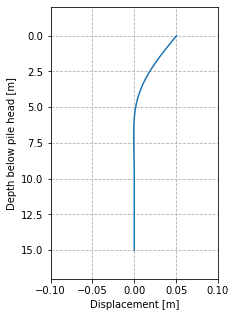

In [3]:
#Idealized soil profile
soil_profile = np.array([[1.0,  1.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 10.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile)

#Pile dimensions
L = 15.0  #m, pile length
D = 0.25  #m, pile diameter
t = 0.01  #m, pile wall thickness
E = 200e9 #Pa, Elastic modulus of steel

#Pile head loads
V_0 = 12e3 #N,  horizontal load on pile head
M_0 = 0    #Nm, moment on pile head
F_0 = 50e3 #N,  vertical load on pile head

y,z = py_monotonic.py_analysis_1_SI(soil_profile, L=L, D=D, t=t, E=E, F=F_0, V_0=V_0, M_0=M_0, print_output='Yes')

#Plot deflection profile of pile
fig, ax = plt.subplots(figsize=(3,5))

ax.plot(y,z)

ax.set_xlabel('Displacement [m]')
ax.set_ylabel('Depth below pile head [m]')
ax.set_ylim([L+2,-2])
ax.set_xlim([-0.1, 0.1])
ax.grid(ls='--')

### Example 2 - Free-head pile with lateral displacement

The function ***py_monotonic.py_analysis_2_SI*** can be used to analyze a free-head pile with lateral displacement, axial load, and moment applied to it.

Please note that a **ValueError** will be returned if the length of the pile is greater than the defined depth of the soil profile.

V_0 = 10016.18-N


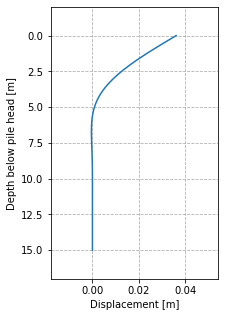

In [4]:
#Idealized soil profile
soil_profile = np.array([[1.0,  1.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 10.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile)

#Pile dimensions
L = 15.0  #m, pile length
D = 0.25  #m, pile diameter
t = 0.01  #m, pile wall thickness
E = 200e9 #Pa, Elastic modulus of steel

#Pile head loads
y_0 = 0.036 #m,  horizontal displacement at pile head
M_0 = 0    #Nm, moment on pile head
F_0 = 0    #N,  vertical load on pile head

y,z, V_0 = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y_0, print_output='Yes')

#Plot deflection profile of pile
fig, ax = plt.subplots(figsize=(3,5))

ax.plot(y, z)

ax.set_xlabel('Displacement [m]')
ax.set_ylabel('Depth below pile head [m]')
ax.set_ylim([L+2,-2])
ax.set_xlim([-0.5*y_0, 1.5*y_0])
ax.grid(ls='--')

### Matlock & Tucker (1961) - Sabine River Test

/home/asitha/Projects/PY_Analysis/py_monotonic.py:656: RuntimeWarning: invalid value encountered in true_divide
  psi = Su/σ_v_eff
/home/asitha/Projects/PY_Analysis/py_monotonic.py:677: RuntimeWarning: divide by zero encountered in double_scalars
  J    = (Su0 + Su)/Su * 2*np.sqrt(2)
/home/asitha/Projects/PY_Analysis/py_monotonic.py:888: RuntimeWarning: invalid value encountered in true_divide
  psi = Su/sigma_v_eff
/home/asitha/Projects/PY_Analysis/py_monotonic.py:926: RuntimeWarning: invalid value encountered in double_scalars
  N_p0 = min(N_1 - (1-alpha) - (N_1 - N_2)*(1.0 - ((z-z_0)/d/D)**0.6)**1.35, N_p_max)


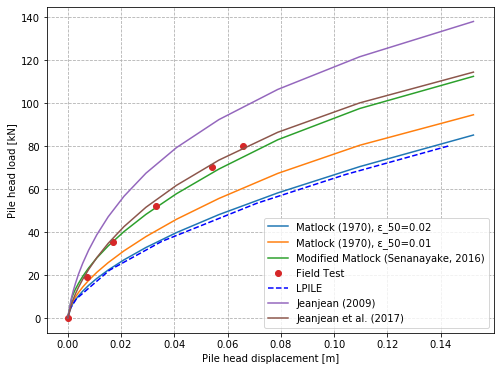

In [99]:
#Design soil profile
soil_profile = np.array([[0.304, 9.58,  10., 'Matlock', 0.02],
                         [15.23, 33.52, 10., 'Matlock', 0.02]])

#Pile dimensions
L = 516./39.4   #m, pile length
D = 12.75/39.4  #m, pile diameter
t = 0.5/39.4    #m, pile wall thickness
E = 210e9       #Pa, Elastic modulus of steel

#Python P-Y analysis
y = 6*np.concatenate([np.array([0]),np.logspace(-2,0,15)/39.4])
V1 = np.zeros(len(y))
V2 = np.zeros(len(y))
V3 = np.zeros(len(y))
V4 = np.zeros(len(y))
V5 = np.zeros(len(y))

for i in range(len(y)-1):
    temp1, temp2, V1[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Matlock', print_output='No',
                                                          epsilon_50=0.02)
    temp1, temp2, V2[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Matlock', print_output='No',
                                                          epsilon_50=0.01)
    temp1, temp2, V3[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='MM-1', print_output='No',
                                                          epsilon_50=0.01)
    temp1, temp2, V4[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Jeanjean_2009', print_output='No', Gmax_Su_ratio=550)
    temp1, temp2, V5[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Jeanjean_etal_2017', print_output='No', Gmax_Su_ratio=550)
    
#Field test result
p1 = np.array([0.0,4.3,7.9,11.7,15.8,18.01])     
y1 = np.array([0.00,0.28,0.67,1.30,2.13,2.60])

#LPILE results, epsilon_50 = 0.02
p2 = np.array([0,1,2,5,8,12,15,18])
y2 = np.array([0.00,0.04,0.13,0.62,1.39,2.80,4.11,5.64])   

#Plot pile head load vs displacement
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(y,V1/1000., label='Matlock (1970), ε_50=0.02')
ax.plot(y,V2/1000., label='Matlock (1970), ε_50=0.01')
ax.plot(y,V3/1000., label='Modified Matlock (Senanayake, 2016)')
ax.plot(y1/39.4, p1*4.45, 'o', label='Field Test')
ax.plot(y2/39.4, p2*4.45, 'b--', label='LPILE')
ax.plot(y,V4/1000., label='Jeanjean (2009)')
ax.plot(y,V5/1000., label='Jeanjean et al. (2017)')

#Axes labels, grid, legend
ax.set_xlabel('Pile head displacement [m]')
ax.set_ylabel('Pile head load [kN]')
ax.grid(ls='--')
ax.legend()

### 4-in diameter aluminium pile in a linearly increasing $S_u$ profile

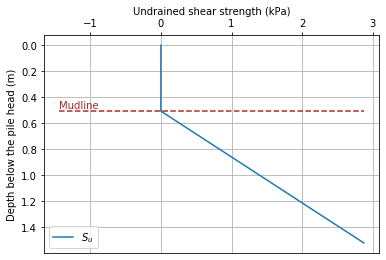

In [125]:
# Design soil profile
# Linearly increasing from 0 to 60psf as measured with T-bar. Unit weight ~ 40pcf.
soil_profile = np.array([[20.0/39.4, 0.01/20.9, 6.3, 'Matlock', 0.02],
                         [60.0/39.4, 60.0/20.9, 6.3, 'Matlock', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile, plot_profile='Yes')

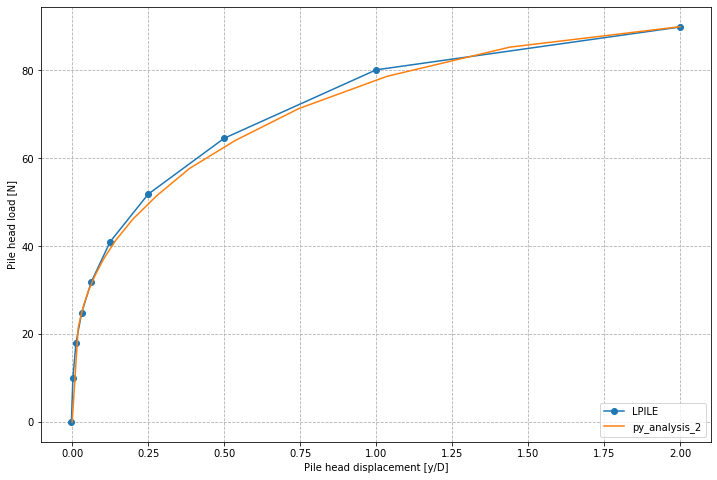

In [148]:
L = 52.0/39.4  # m
D = 4.0/39.4   # m
t = 0.125*25.4 # mm
E = 69e9       # Pa, Elastic modulus of aluminium

y = 2*D*np.concatenate([np.array([0]),np.logspace(-2,0,15)])
V1 = np.zeros(len(y))

for i in range(len(y)-1):
    temp1, temp2, V1[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t,  F=0.0, E=E, y_0=y[i+1], n=15, 
                                       iterations=10, convergence_tracker='No', py_model='Matlock', print_output='No', epsilon_50=0.02)

#LPILE results Matlock (1970), epsilon_50=0.02
x = np.array([-0.01, 0.01, 0.05, 0.125, 0.25, 0.5, 1, 2, 4, 8]) # in
V2 = np.array([0.00,2.26,4.03,5.58,7.15,9.22,11.65,14.51,18.01, 20.2]) # lb

#Plot results
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x/39.4/D, V2*4.45, 'o-', label='LPILE')
ax.plot(y/D, V1, '-', label='py_analysis_2')
ax.set_xlabel('Pile head displacement [y/D]')
ax.set_ylabel('Pile head load [N]')
# ax.set_xlim([-0.05*D, D])
plt.legend(loc='lower right')
plt.grid(ls='--')

### IMPORTANT

**Always do a sensitivity analysis when selecting the number of elements and the number of iterations.**

* An element size that is approximately equal to the pile diameter seems give the best results. Element sizes that are too small (i.e number of elements too high) will cause the finite-difference matrix to be ill-conditioned and the solution may not be accurate.
* The convergence tracker option can be used to inspect the p-y curve at any node and see whether the specified number of iterations was sufficient to converge to a point on the curve.
* *loc=15* in the example below plots the p-y curve at node 15.

V_0 = 124880.95-N


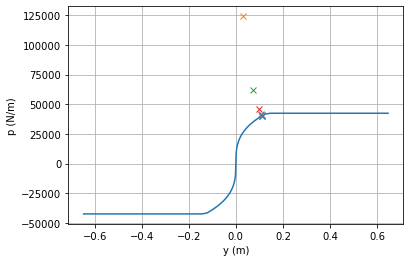

In [167]:
#Design soil profile
soil_profile = np.array([[0.304, 9.58,  10., 'Matlock', 0.02],
                         [15.23, 33.52, 10., 'Matlock', 0.02]])

#Pile dimensions
L = 516./39.4   #m, pile length
D = 12.75/39.4  #m, pile diameter
t = 0.5/39.4    #m, pile wall thickness
E = 210e9       #Pa, Elastic modulus of steel

_ = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t,  F=0.0, E=E, y_0=D, n=50, 
                                  iterations=10, py_model='Matlock', epsilon_50=0.02,
                                  print_output='Yes', convergence_tracker='Yes', loc=15)